## What Sound tells Us (Exploratory Data Analysis of the Sound)

### Lets start with **NORMAL SOUND**

In [180]:
# starting with essential libraries
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import librosa, librosa.display
import IPython.display as ipd
import librosa
import librosa.display


### Now one more thing to note:
#### All the graphs will be generated using two different libraries namely Librosa and SkLearn's WaveFile
#### The reason will get unveiled as we go further

# Import the sample using the Wavefile format

### It is better to note the shape of the sound numericized 

In [6]:
sampFreq, sound_normal = wavfile.read("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/normal__127_1306764300147_A.wav")

sound_normal.shape

(38532,)

### Below we get an overview of what the normal heart beat signal looks like
It basically is like the. A normal heart sound has a clear “lub dub, lub dub” pattern, with the time from “lub” to “dub” shorter than the time from “dub” to the next “lub” (when the heart rate is less than 140 beats per minute). Note the temporal description of “lub” and “dub” locations over time in the following illustration:

…lub……….dub……………. lub……….dub……………. lub……….dub……………. lub……….dub…

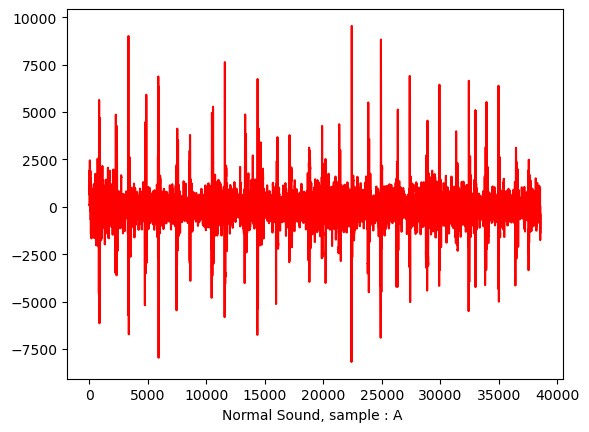

In [9]:
# this is the general overview of the graph in a waveform manner
plt.plot(sound_normal, 'r')
plt.xlabel("Normal Sound, sample : A ")
plt.show()

In [10]:
sound_normal.shape[0]

38532

### From the above waveform graph
#### We get infered nothing, but if we zoom it timing well, like we here zoom in at time between 5 to 6.2 sec interval we get the below graph.

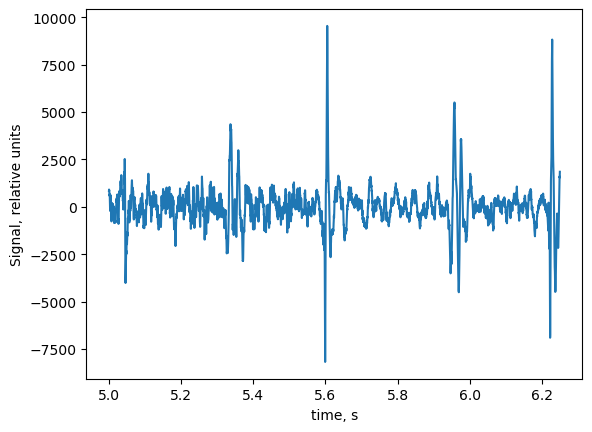

In [12]:
Zoom1 = sound_normal
length_in_s = sound_normal.shape[0] / sampFreq
time = np.arange(sound_normal.shape[0]) / sound_normal.shape[0] * length_in_s
plt.plot(time[20000:25000], Zoom1[20000:25000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

#### Then after this if we take out another sample in the same manner keeping the time interval same then we get another graph,
#### This one between 0 to 5 seconds

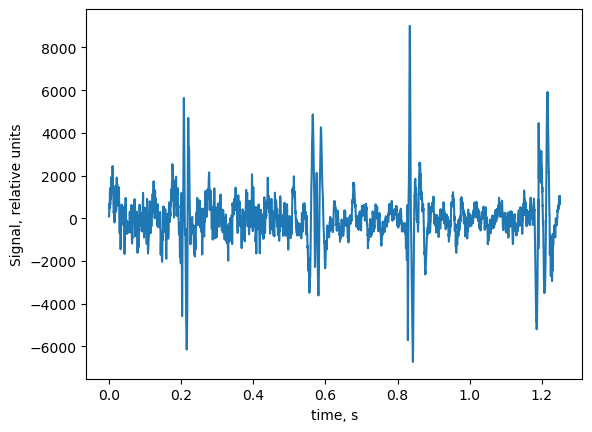

In [14]:
Zoom1 = sound_normal
length_in_s = sound_normal.shape[0] / sampFreq
time = np.arange(sound_normal.shape[0]) / sound_normal.shape[0] * length_in_s
plt.plot(time[0:5000], Zoom1[0:5000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

## Final Inference of doing all this ?
#### Well by doing this we now compare both the sample in a overlapping graph,
#### we immediately notice the striking similar pattern, offset by the improper time window selection ,
#### But the fact remains that the pattern is matched, hence we get our first pattern (The normal pattern)

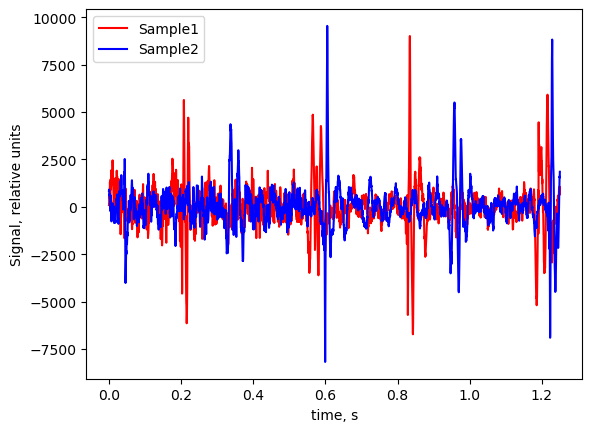

In [16]:
plt.plot(time[0:5000], Zoom1[0:5000],color = 'r', label = 'Sample1')
plt.plot(time[0:5000], Zoom1[20000:25000],color = 'b', label = 'Sample2')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.legend()
plt.show()

# The Frequency Domain Plots

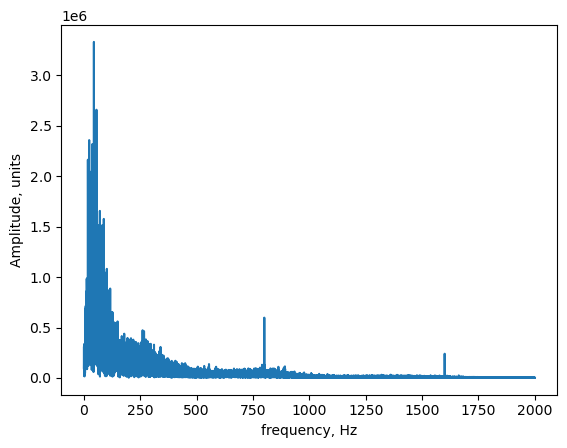

In [18]:
fft_spectrum = np.fft.rfft(sound_normal)
freq = np.fft.rfftfreq(sound_normal.size, d=1./sampFreq)
fft_spectrum
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

#### This is the same plot except it is the histogram plot form

<Axes: ylabel='Count'>

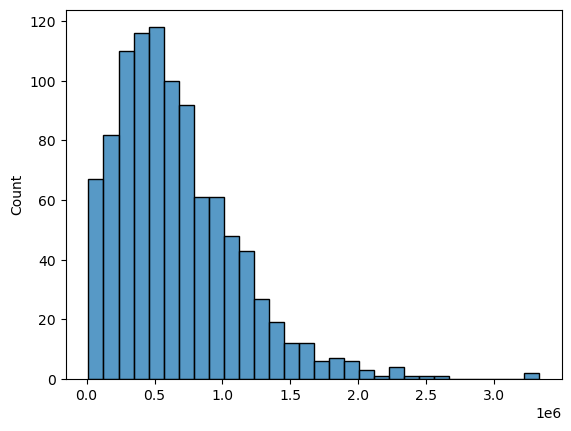

In [20]:
import seaborn as sb
sb.histplot(fft_spectrum_abs[:1000])

## This is the audio file we are processing, give it a listen......

In [47]:
ipd.Audio("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/normal__127_1306764300147_A.wav")

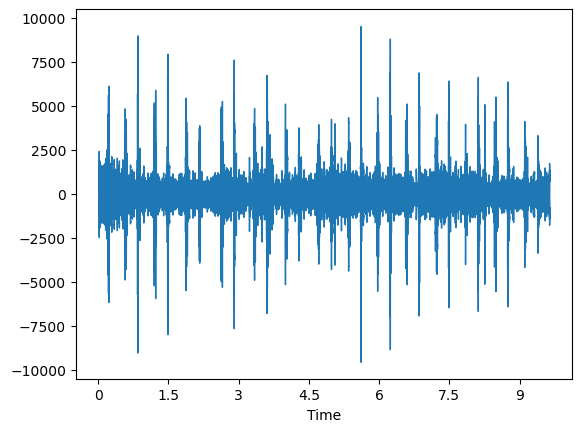

In [49]:
data,frame=librosa.load('C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/normal__127_1306764300147_A.wav')
librosa.display.waveshow(sound_normal.astype(np.float32),sr=sampFreq
                         )

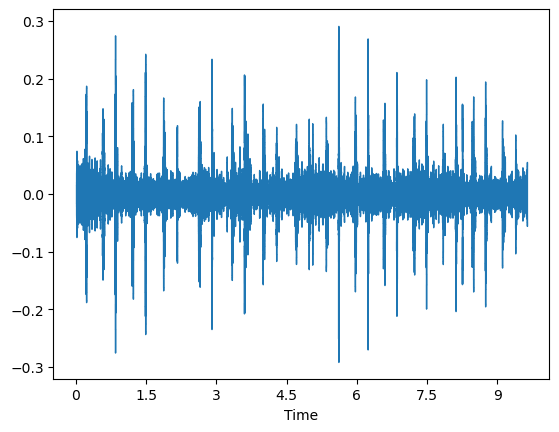

In [50]:
librosa.display.waveshow(data,sr=frame
                         )

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

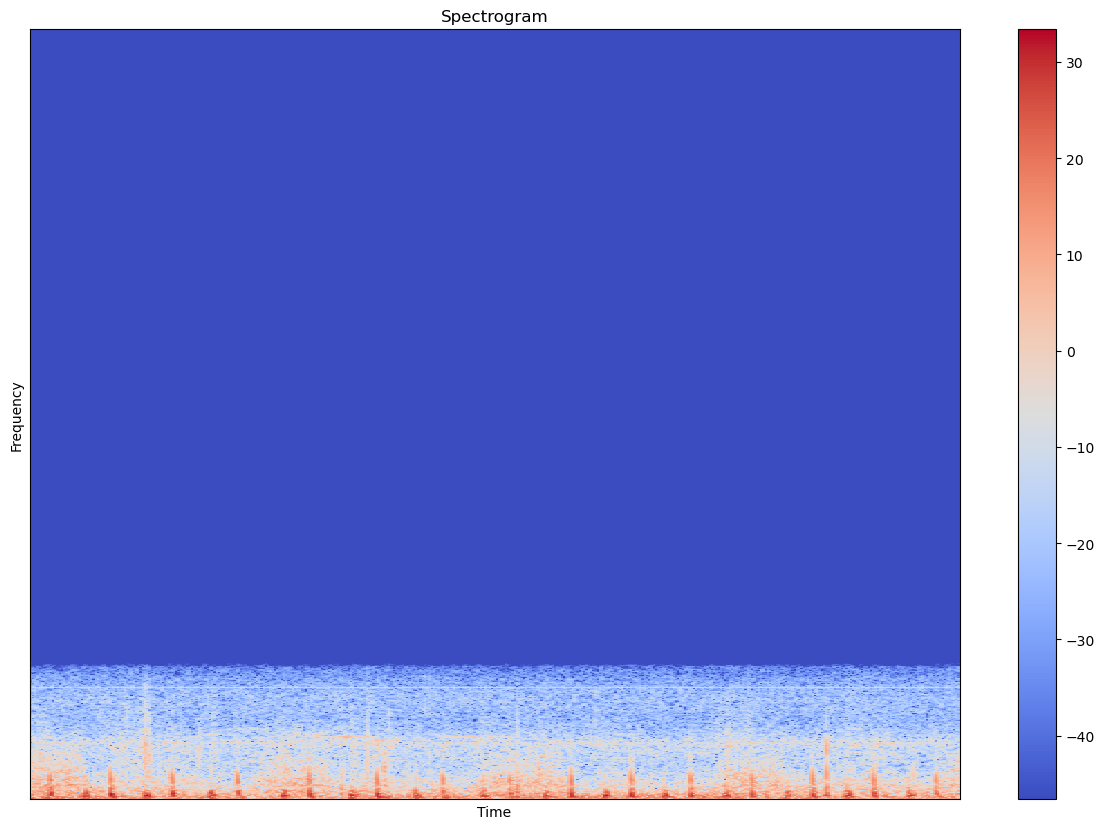

In [51]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/frame
n_fft_duration = float(n_fft)/frame

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(data, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=frame, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

## In a similar manner we also plot a spectrogram plot the data picked up by Wavefile
#### And realize that the changes is in the units. The librosa graph is a bit scaled down version of the Wavefile one, but it depends on the data too.

STFT hop length duration is: 0.128s
STFT window duration is: 0.512s


Text(0.5, 1.0, 'Spectrogram')

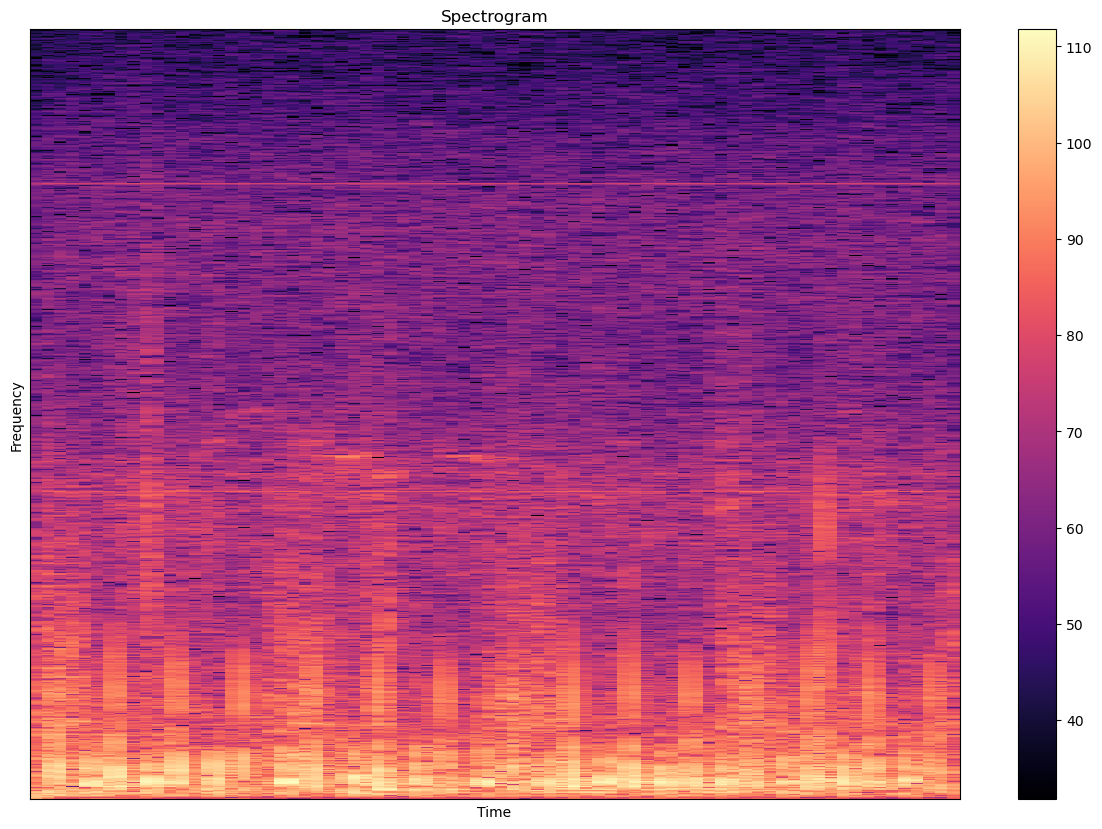

In [53]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sampFreq
n_fft_duration = float(n_fft)/sampFreq

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(sound_normal.astype(np.float32), n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sampFreq, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

# The below is the MFCC Plot

#### In a similar fation we have plot both the librosa and the wavefile to understand difference, and evaluate the wether it is necessary.

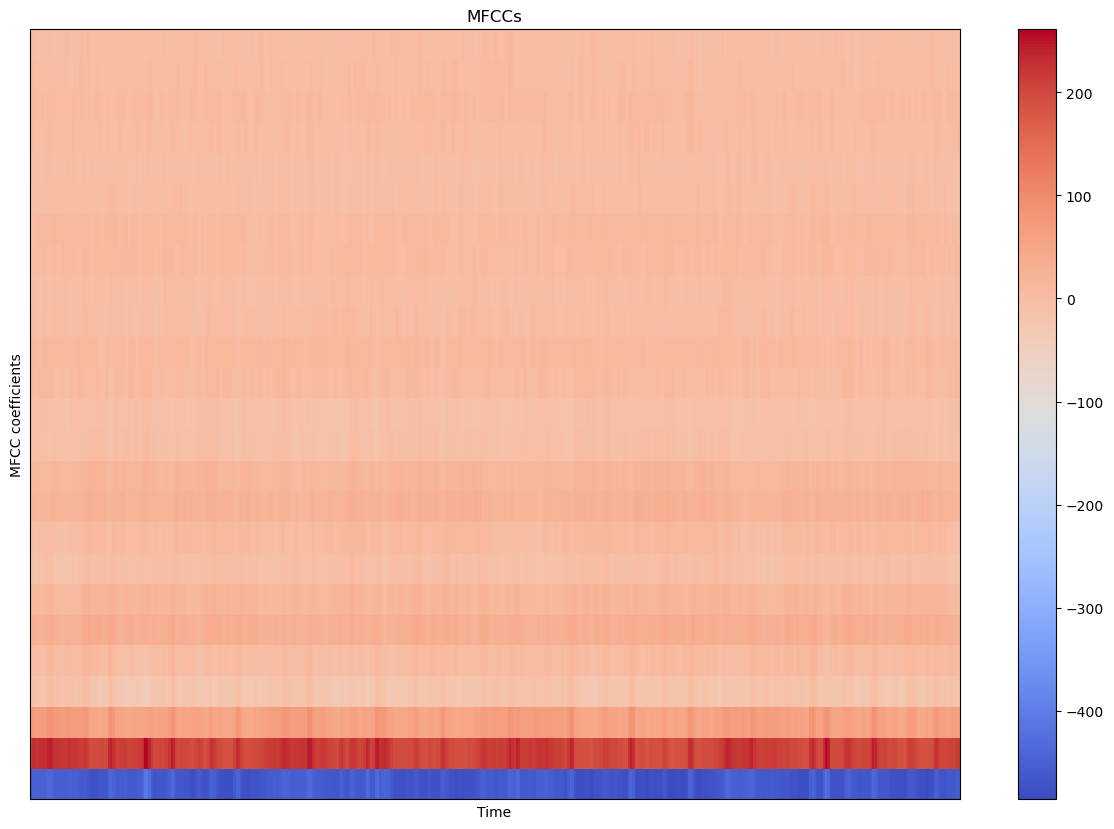

In [56]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=data,sr=frame,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=frame, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

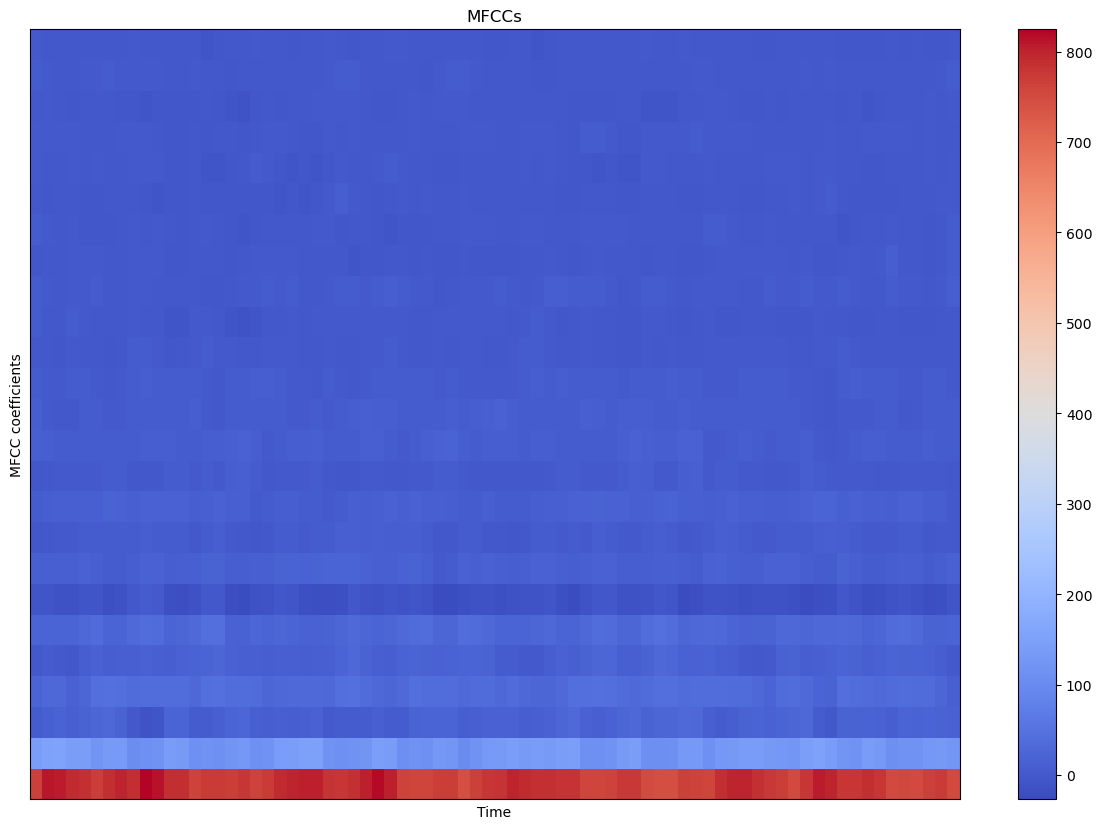

In [57]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=sound_normal.astype(np.float32),sr=sampFreq,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sampFreq, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [58]:
sound_normal.shape

(38532,)

In [59]:
fft_spectrum

array([  93637.        +0.00000000e+00j, -221338.91239075+2.18147987e+05j,
         31963.73177622-8.57189626e+04j, ...,
         -1052.70775033+5.88619814e+02j,   -1105.26707055+4.34852256e+01j,
         -2129.        +0.00000000e+00j])

### The distribution Graph of the fast fourier transform to find the type of distribution the order to follow

C:\Users\krake\AppData\Local\Temp\ipykernel_10340\3004528713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(fft_spectrum)
C:\Users\krake\anaconda3\Lib\site-packages\seaborn\distributions.py:2443: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.asarray(a, float)


<Axes: ylabel='Density'>

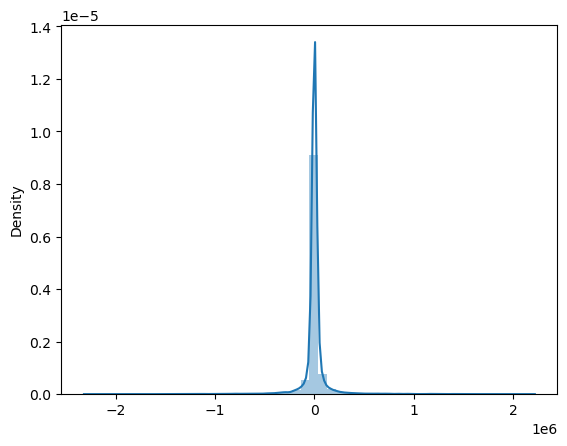

In [61]:
sb.distplot(fft_spectrum)

### Let's Move ahed with MURMUR SOUND

#### In a similar manner as above we plot all the graphs and make our inferences, from pattern recognization to MFCC, there are no as such change in it but for inference we have compared it to the normal graph and thats it......

## Description of Murmur:
##### Heart murmurs sound as though there is a “whooshing, roaring, rumbling, or turbulent fluid” noise in one of two temporal locations: (1) between “lub” and “dub”, or (2) between “dub” and “lub”. They can be a symptom of many heart disorders, some serious. There will still be a “lub” and a “dub”. One of the things that confuses non-medically trained people is that murmurs happen between lub and dub or between dub and lub; not on lub and not on dub. Below, you can find an asterisk* at the locations a murmur may be.

##### …lub..****...dub……………. lub..****..dub ……………. lub..****..dub ……………. lub..****..dub …
or
##### …lub……….dub…******….lub………. dub…******….lub ………. dub…******….lub ……….dub…

In [79]:
sampFreq1, sound_murmur = wavfile.read("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/murmur__162_1307101835989_A.wav")

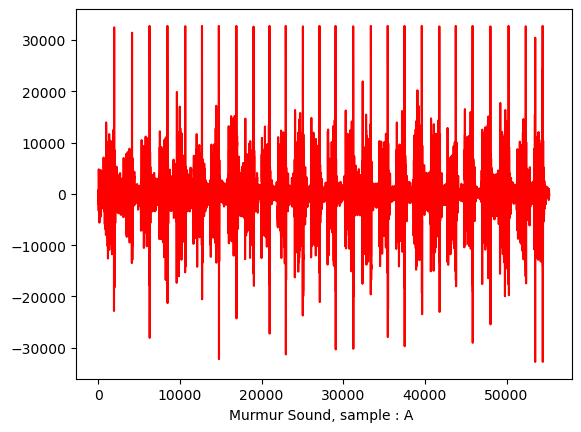

In [81]:
plt.plot(sound_murmur, 'r')
plt.xlabel("Murmur Sound, sample : A ")
plt.show()

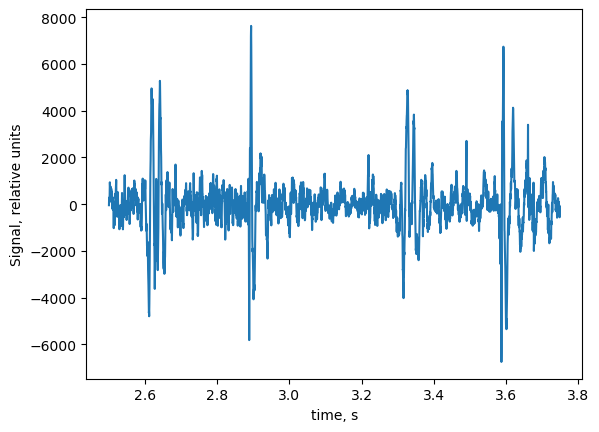

In [82]:
Zoom2 = sound_murmur
length_in_s = sound_normal.shape[0] / sampFreq
time = np.arange(sound_normal.shape[0]) / sound_normal.shape[0] * length_in_s
plt.plot(time[10000:15000], Zoom1[10000:15000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

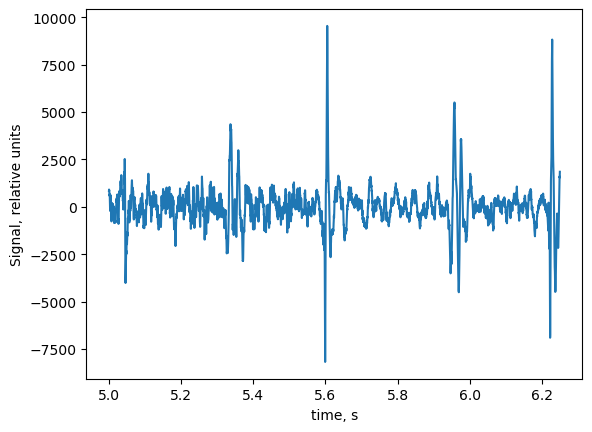

In [85]:
Zoom2 = sound_murmur
length_in_s = sound_normal.shape[0] / sampFreq
time = np.arange(sound_normal.shape[0]) / sound_normal.shape[0] * length_in_s
plt.plot(time[20000:25000], Zoom1[20000:25000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

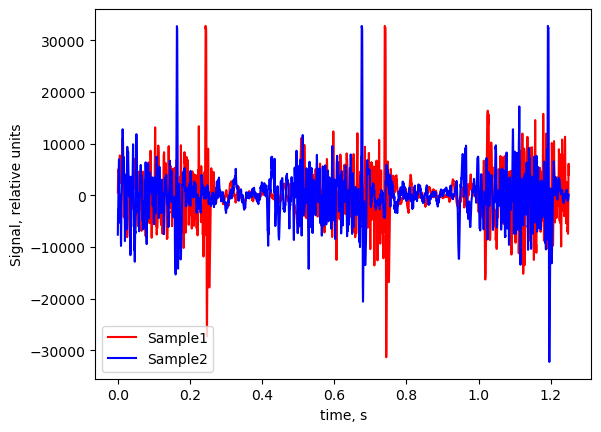

In [86]:
plt.plot(time[0:5000], Zoom2[20000:25000],color = 'r', label = 'Sample1')
plt.plot(time[0:5000], Zoom2[10000:15000],color = 'b', label = 'Sample2')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.legend()
plt.show()

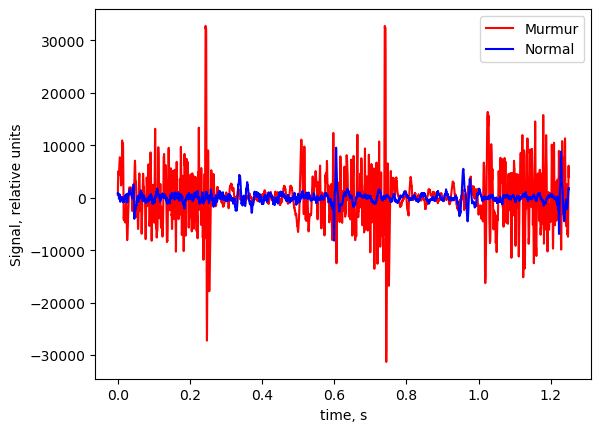

In [89]:
plt.plot(time[0:5000], Zoom2[20000:25000],color = 'r', label = 'Murmur')
plt.plot(time[0:5000], Zoom1[20000:25000],color = 'b', label = 'Normal')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.legend()
plt.show()

In [90]:
ipd.Audio("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/murmur__162_1307101835989_A.wav")

In [93]:
data1,frame1=librosa.load('C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/murmur__162_1307101835989_A.wav')

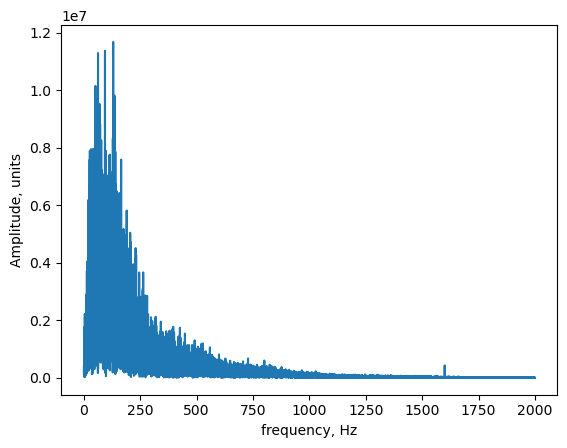

In [95]:
fft_spectrum = np.fft.rfft(sound_murmur)
freq = np.fft.rfftfreq(sound_murmur.size, d=1./sampFreq1)
fft_spectrum
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

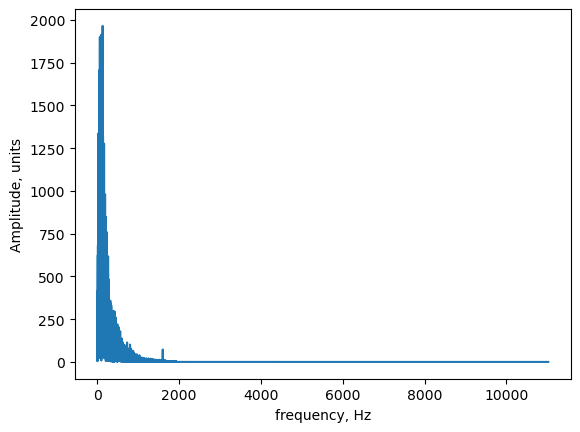

In [97]:
fft_spectrum = np.fft.rfft(data1)
freq = np.fft.rfftfreq(data1.size, d=1./frame1)
fft_spectrum
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

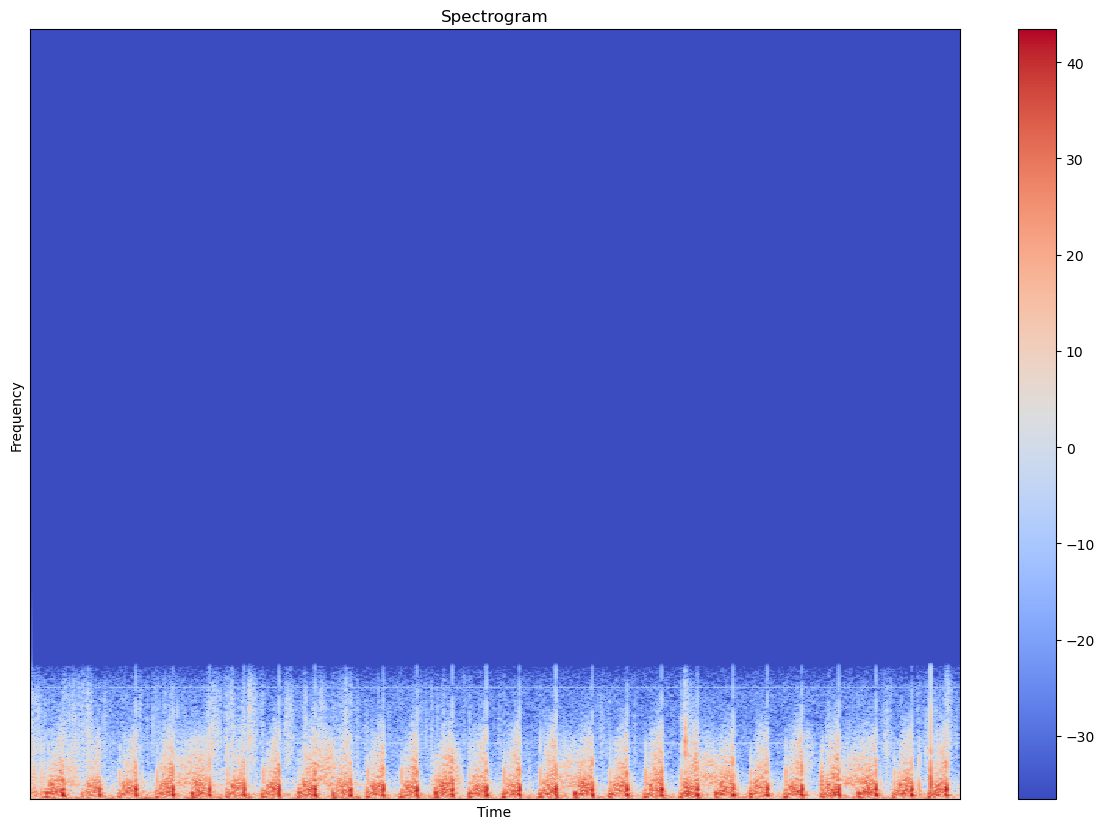

In [98]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/frame1
n_fft_duration = float(n_fft)/frame1

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(data1, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=frame, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

STFT hop length duration is: 0.128s
STFT window duration is: 0.512s


Text(0.5, 1.0, 'Spectrogram')

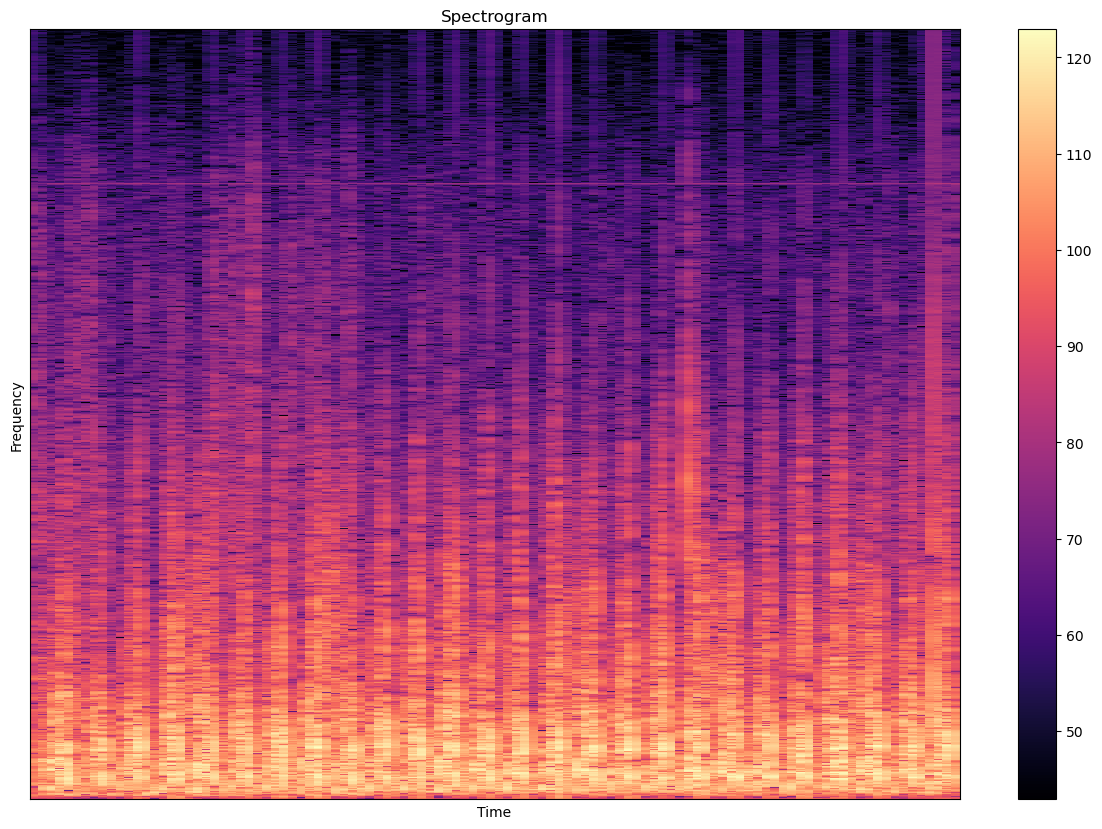

In [100]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sampFreq1
n_fft_duration = float(n_fft)/sampFreq1

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(sound_murmur.astype(np.float32), n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sampFreq, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

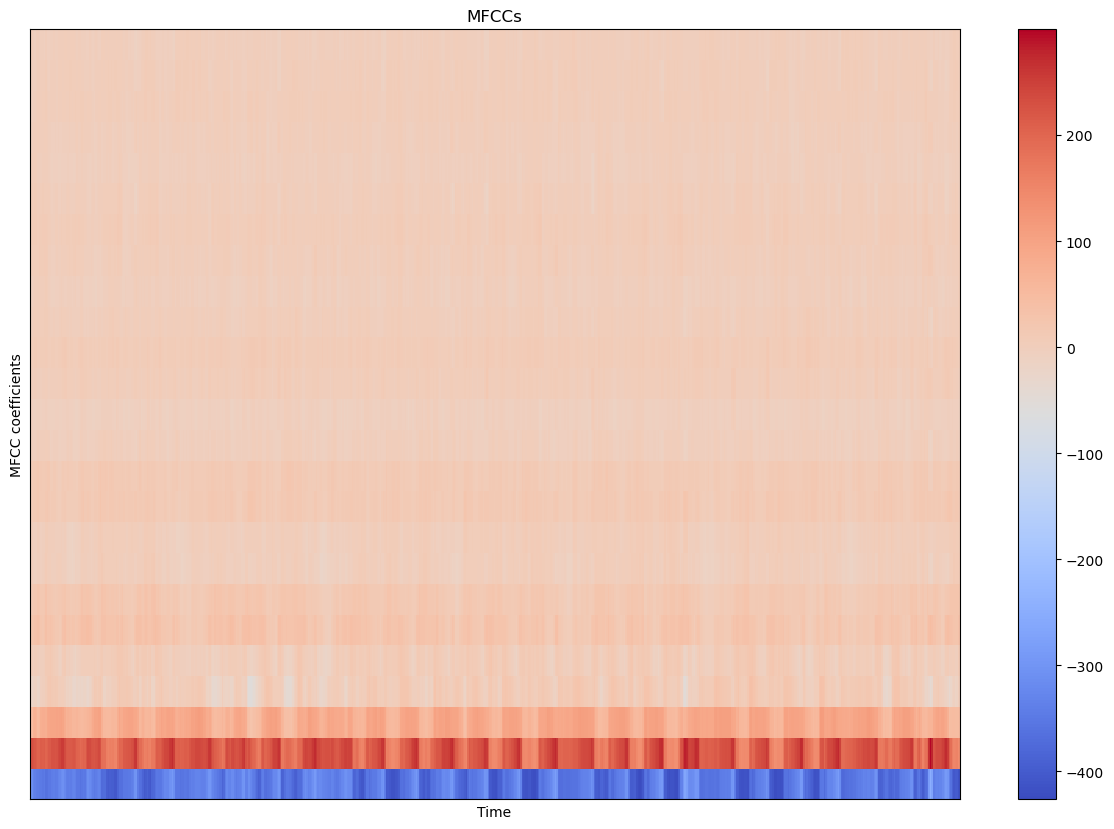

In [101]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=data1,sr=frame1,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=frame1, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

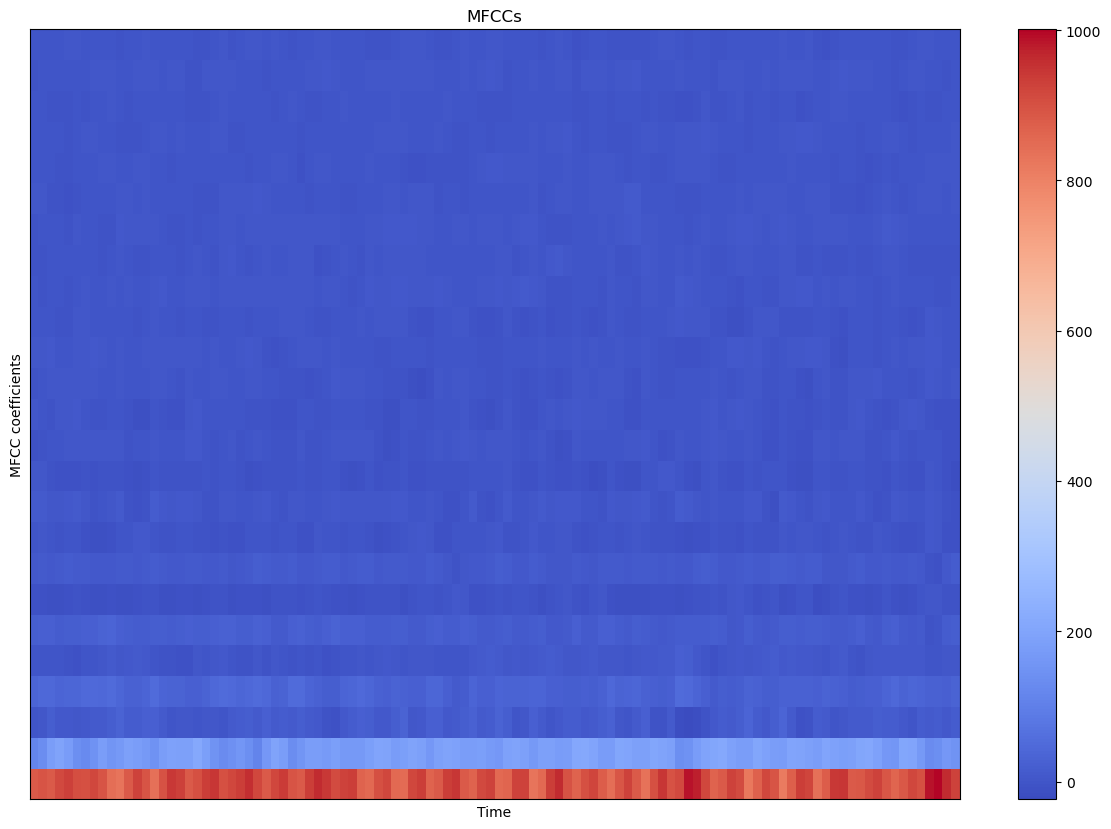

In [102]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=sound_murmur.astype(np.float32),sr=sampFreq1,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sampFreq1, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

C:\Users\krake\AppData\Local\Temp\ipykernel_10340\3004528713.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sb.distplot(fft_spectrum)
C:\Users\krake\anaconda3\Lib\site-packages\seaborn\distributions.py:2443: ComplexWarning: Casting complex values to real discards the imaginary part
  a = np.asarray(a, float)


<Axes: ylabel='Density'>

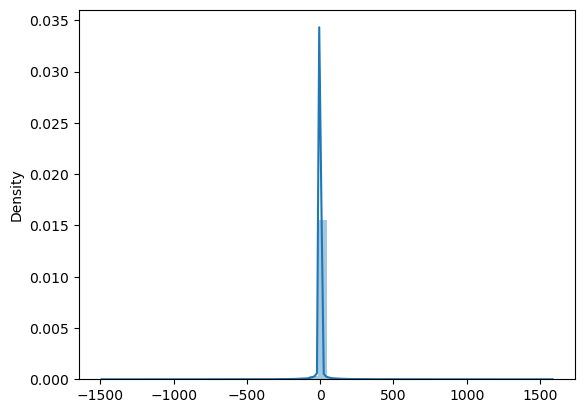

In [104]:
sb.distplot(fft_spectrum)

### Now lets move ahed with Extrasystol

In [106]:
sampFreq2, sound_extrasystol = wavfile.read("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/extrastole__179_1307990076841_C.wav")

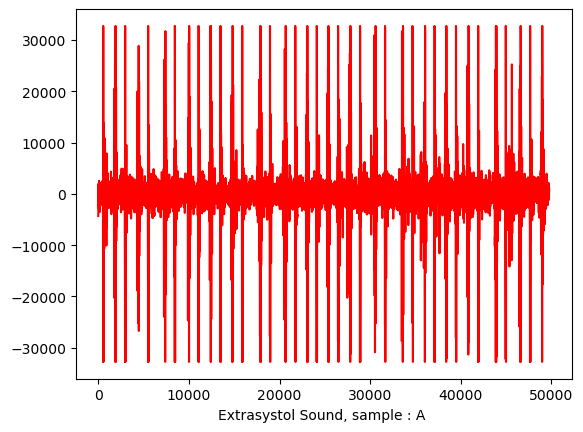

In [108]:
plt.plot(sound_extrasystol, 'r')
plt.xlabel("Extrasystol Sound, sample : A ")
plt.show()

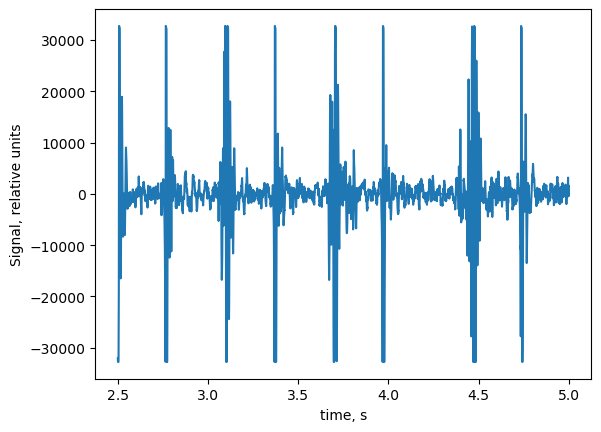

In [112]:
Zoom3 = sound_extrasystol
length_in_s = sound_extrasystol.shape[0] / sampFreq2
time = np.arange(sound_extrasystol.shape[0]) / sound_extrasystol.shape[0] * length_in_s
plt.plot(time[10000:20000], Zoom3[10000:20000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

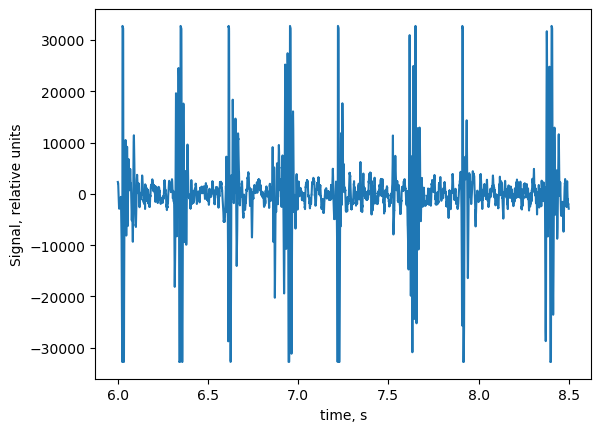

In [113]:
Zoom3 = sound_extrasystol
length_in_s = sound_extrasystol.shape[0] / sampFreq2
time = np.arange(sound_extrasystol.shape[0]) / sound_extrasystol.shape[0] * length_in_s
plt.plot(time[24000:34000], Zoom3[24000:34000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

In [114]:
data2,frame2=librosa.load('C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_b/extrastole__179_1307990076841_C.wav')

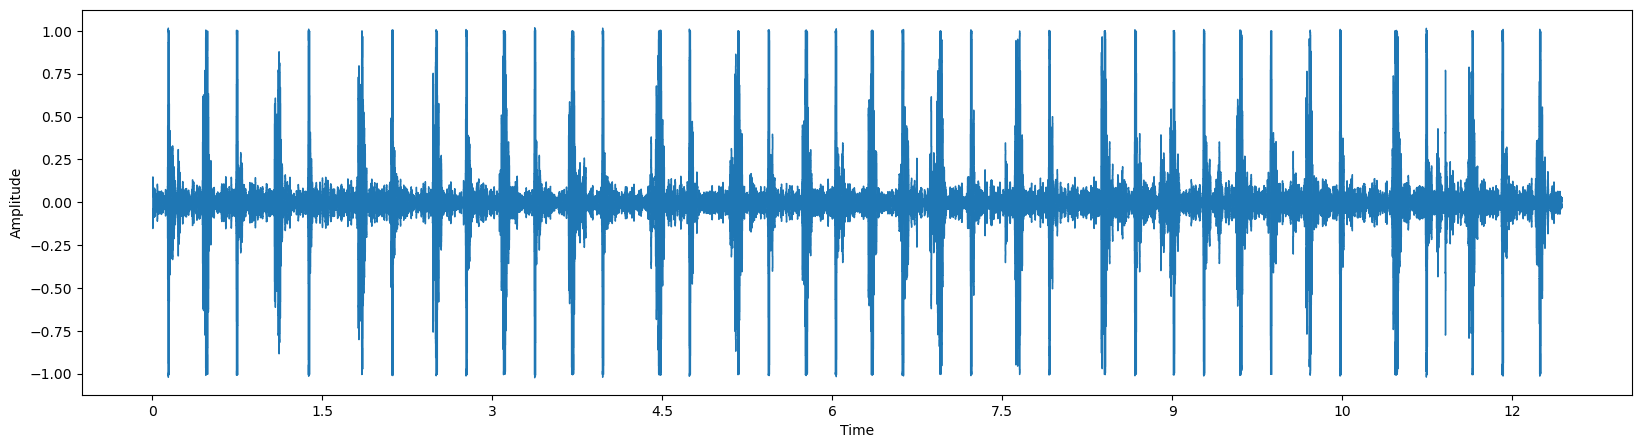

In [115]:
plt.figure(figsize=(20,5))
librosa.display.waveshow(data2, sr = frame2)
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.show()

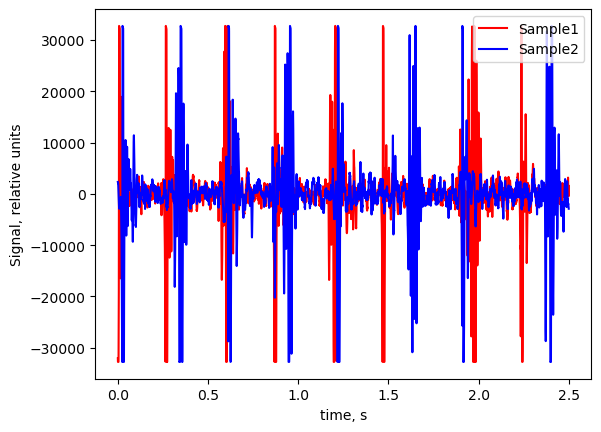

In [116]:
plt.plot(time[0:10000], Zoom3[10000:20000],color = 'r', label = 'Sample1')
plt.plot(time[0:10000], Zoom3[24000:34000],color = 'b', label = 'Sample2')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.legend()
plt.show()

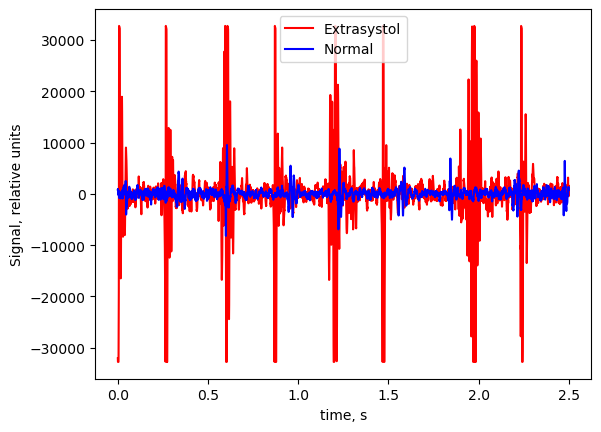

In [119]:
plt.plot(time[0:10000], Zoom3[10000:20000],color = 'r', label = 'Extrasystol')
plt.plot(time[0:10000], Zoom1[20000:30000],color = 'b', label = 'Normal')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.legend()
plt.show()

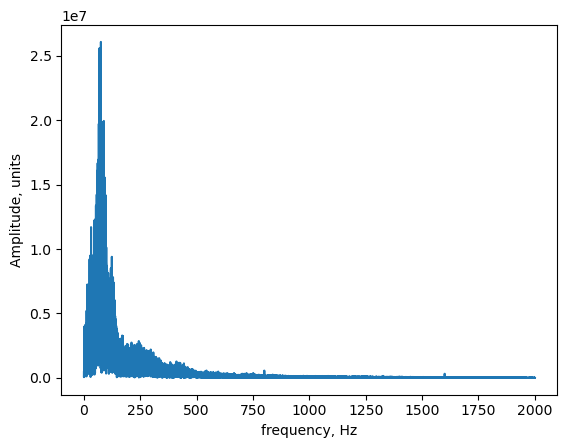

In [121]:
fft_spectrum = np.fft.rfft(sound_extrasystol)
freq = np.fft.rfftfreq(sound_extrasystol.size, d=1./sampFreq2)
fft_spectrum
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

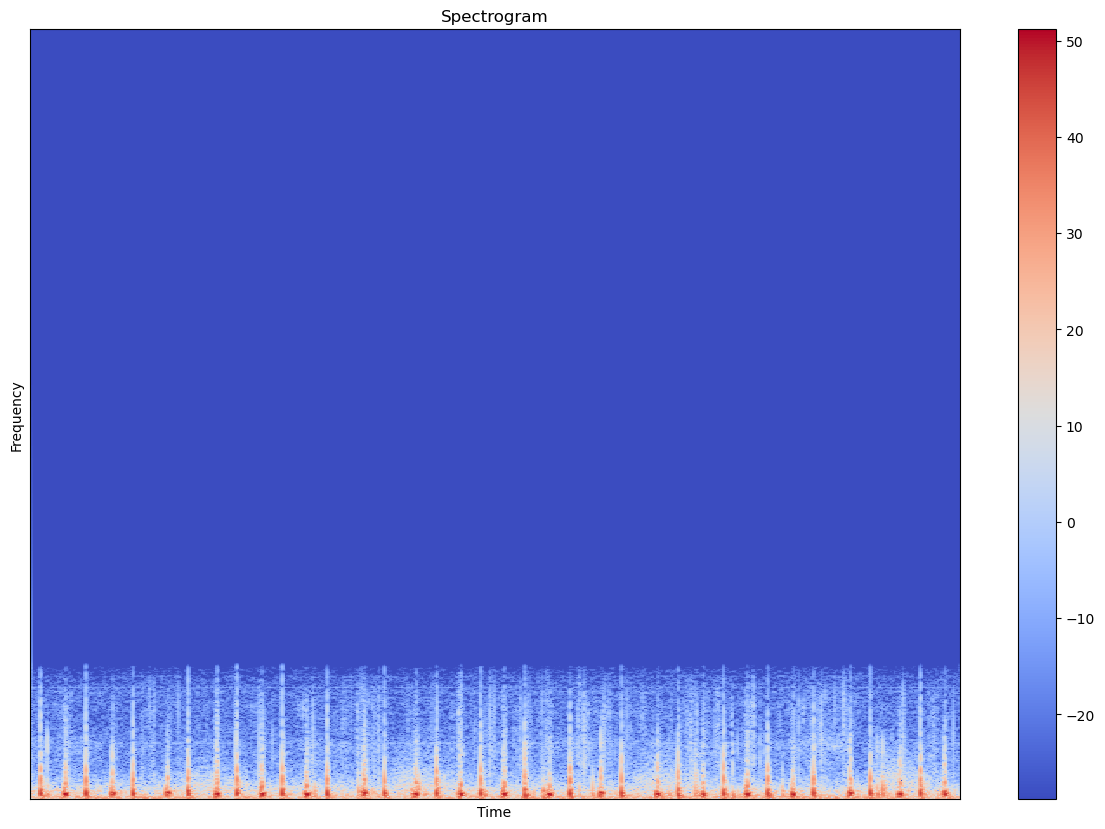

In [123]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/frame2
n_fft_duration = float(n_fft)/frame2

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(data2, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=frame, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

STFT hop length duration is: 0.128s
STFT window duration is: 0.512s


Text(0.5, 1.0, 'Spectrogram')

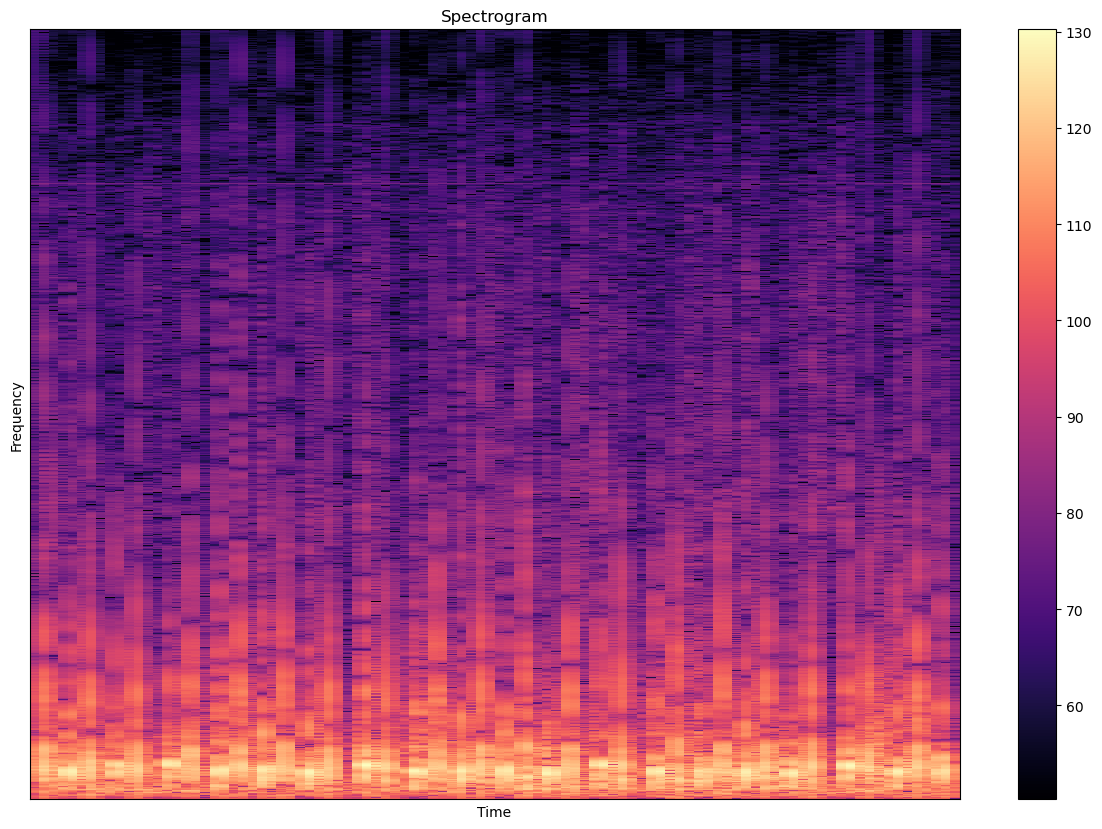

In [124]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sampFreq2
n_fft_duration = float(n_fft)/sampFreq2

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(sound_extrasystol.astype(np.float32), n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sampFreq, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

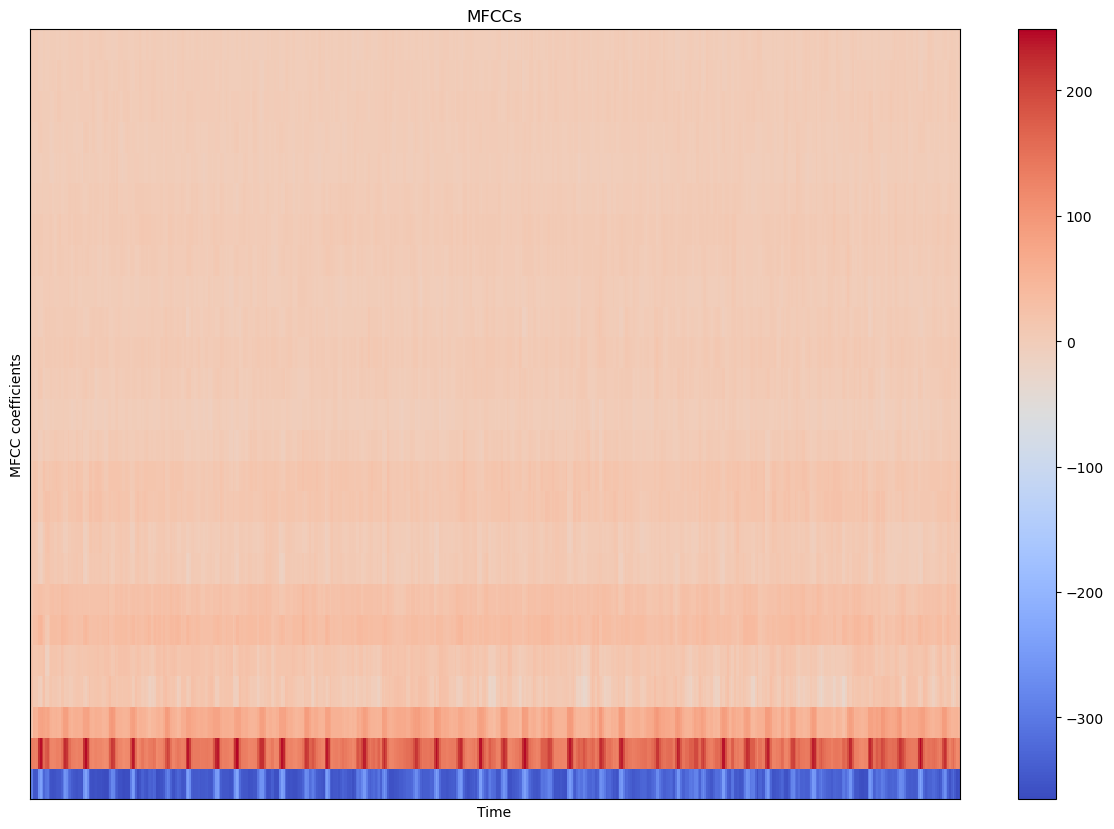

In [127]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=data2,sr=frame2,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=frame2, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

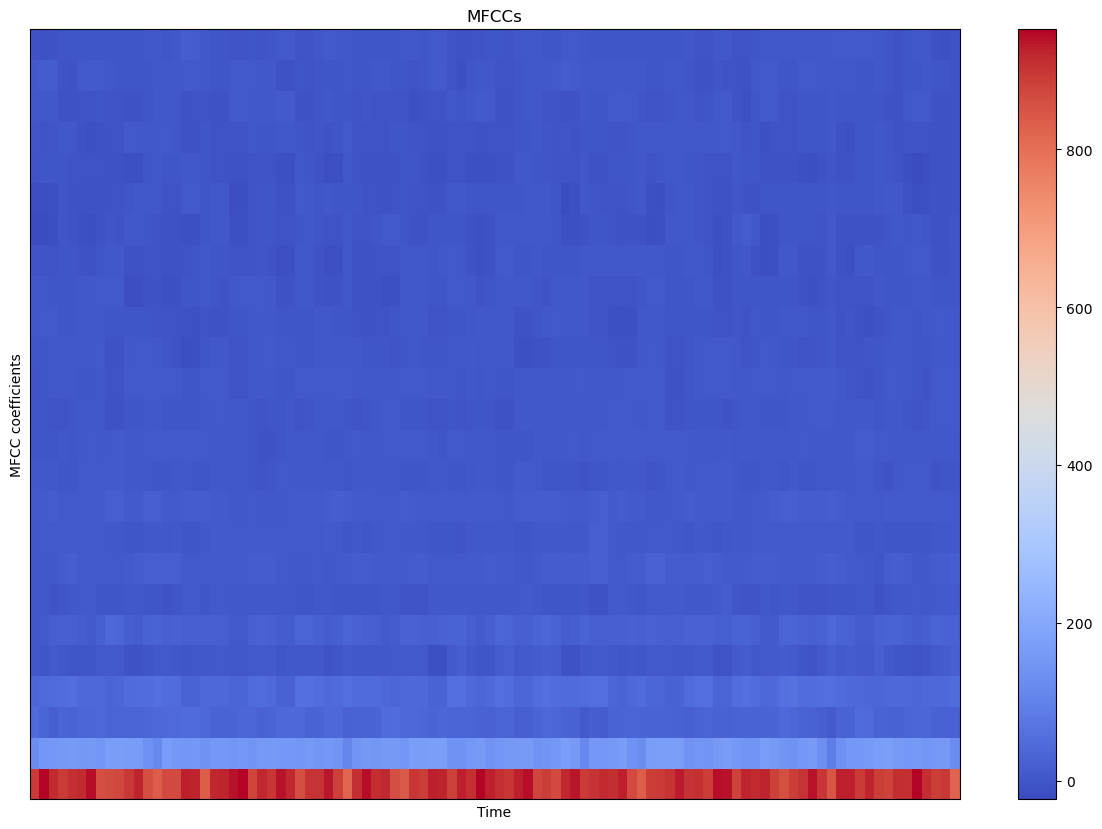

In [128]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=sound_extrasystol.astype(np.float32),sr=sampFreq2,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sampFreq2, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

## Description of Extrahls:
##### Extra heart sounds can be identified because there is an additional sound, e.g. a “lub-lub dub” or a “lub dub-dub”. An extra heart sound may not be a sign of disease.  However, in some situations it is an important sign of disease, which if detected early could help a person.  The extra heart sound is important to be able to detect as it cannot be detected by ultrasound very well. Below, note the temporal description of the extra heart sounds:

##### …lub.lub……….dub………..………. lub. lub……….dub…………….lub.lub……..…….dub…….
or
##### …lub………. dub.dub………………….lub.……….dub.dub………………….lub……..…….dub. dub……

In [132]:
sampFreq3, sound_extrahls = wavfile.read("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/extrahls__201103182227.wav")

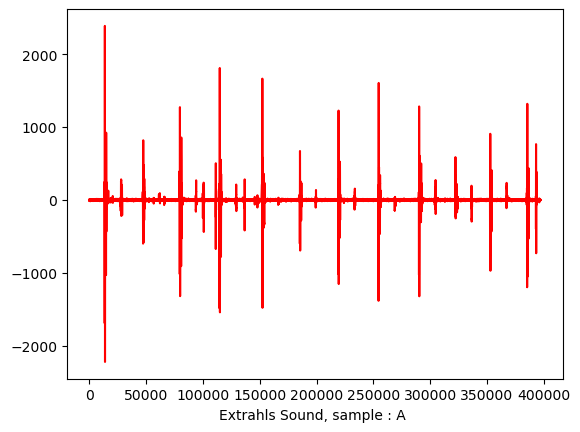

In [134]:
plt.plot(sound_extrahls, 'r')
plt.xlabel("Extrahls Sound, sample : A ")
plt.show()

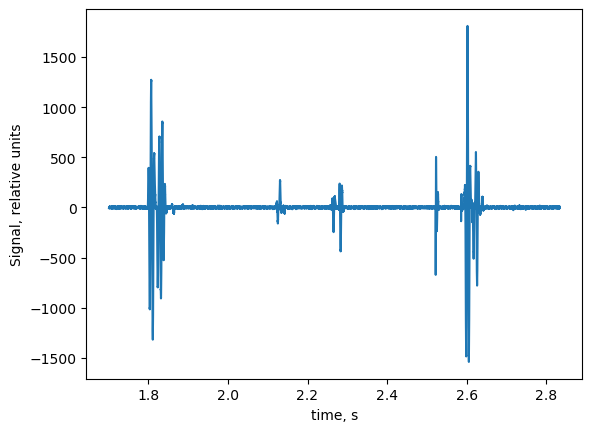

In [135]:
Zoom4 = sound_extrahls
length_in_s = sound_extrahls.shape[0] / sampFreq3
time = np.arange(sound_extrahls.shape[0]) / sound_extrahls.shape[0] * length_in_s
plt.plot(time[75000:125000], Zoom4[75000:125000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

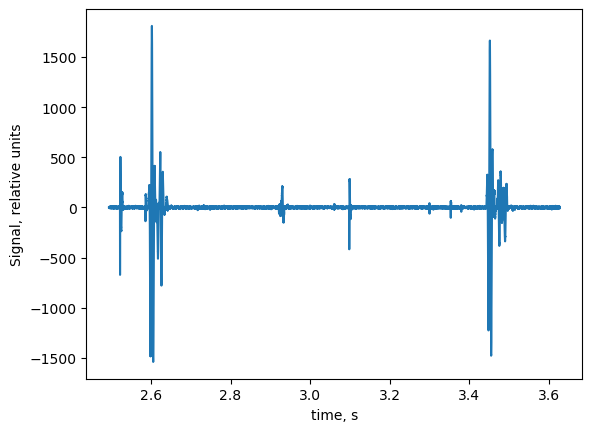

In [137]:
Zoom4 = sound_extrahls
length_in_s = sound_extrahls.shape[0] / sampFreq3
time = np.arange(sound_extrahls.shape[0]) / sound_extrahls.shape[0] * length_in_s
plt.plot(time[110000:160000], Zoom4[110000:160000])
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.show()

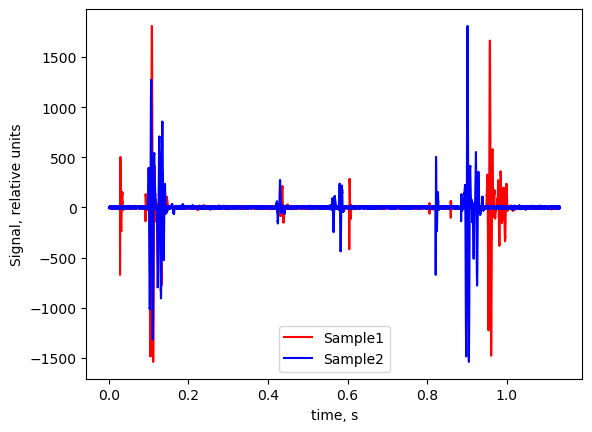

In [139]:
plt.plot(time[0:50000], Zoom4[110000:160000],color = 'r', label = 'Sample1')
plt.plot(time[0:50000], Zoom4[75000:125000],color = 'b', label = 'Sample2')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.legend()
plt.show()

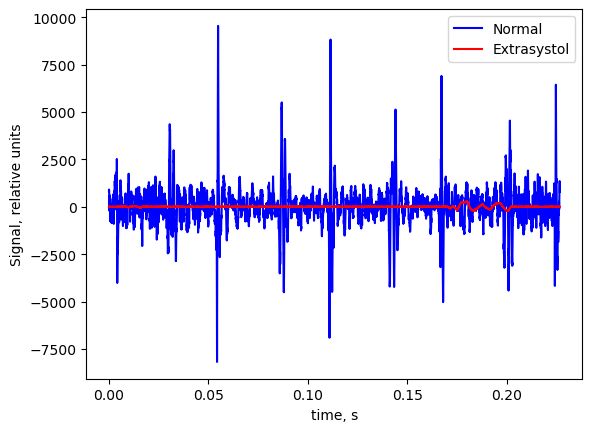

In [140]:
plt.plot(time[0:10000], Zoom1[20000:30000],color = 'b', label = 'Normal')
plt.plot(time[0:10000], Zoom4[20000:30000],color = 'r', label = 'Extrasystol')
plt.xlabel("time, s")
plt.ylabel("Signal, relative units")
plt.legend()
plt.show()

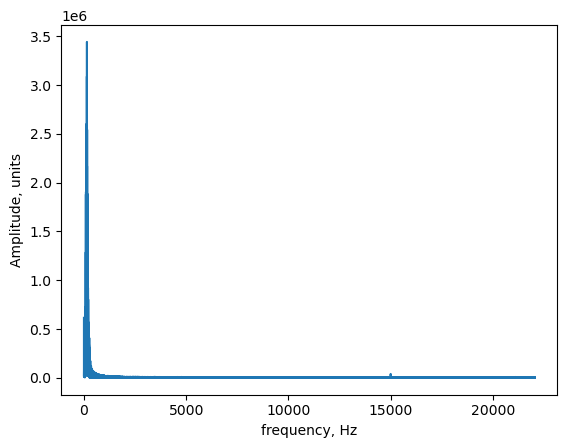

In [141]:
fft_spectrum = np.fft.rfft(sound_extrahls)
freq = np.fft.rfftfreq(sound_extrahls.size, d=1./sampFreq3)
fft_spectrum
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

In [142]:
data3,frame3=librosa.load("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/extrahls__201103182227.wav")

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

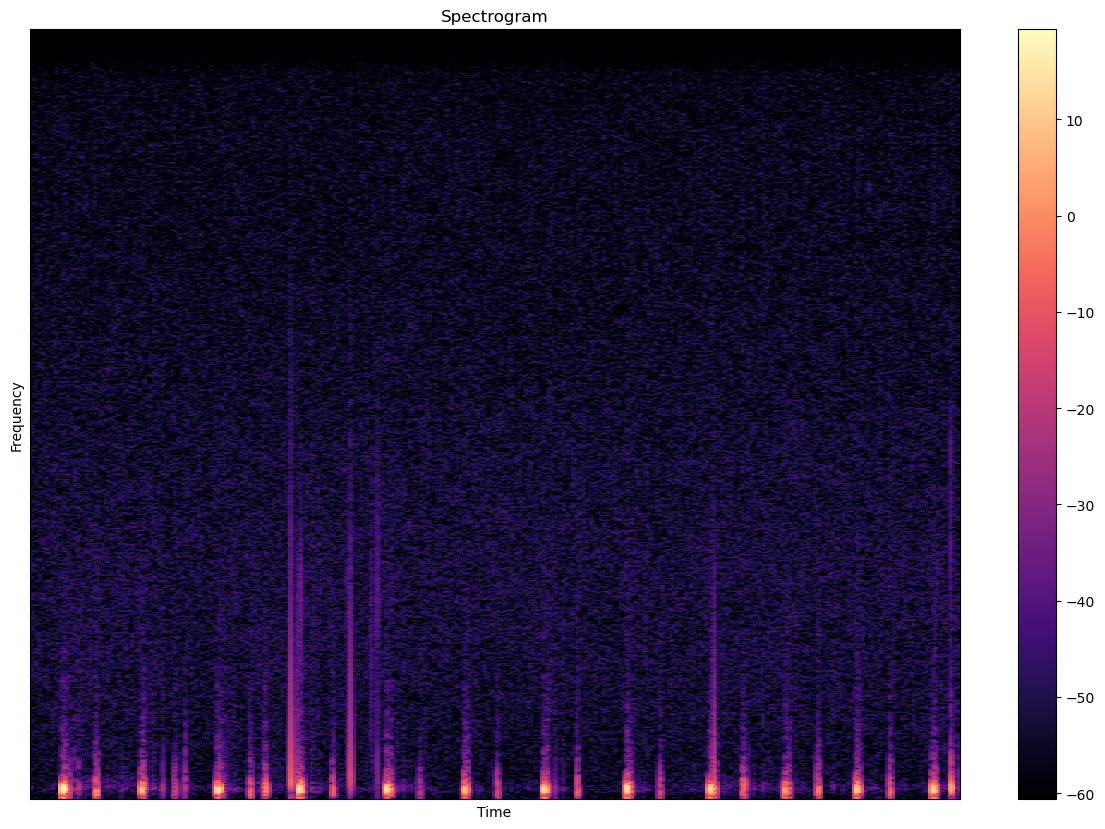

In [143]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/frame3
n_fft_duration = float(n_fft)/frame3

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(data3, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=frame, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


Text(0.5, 1.0, 'Spectrogram')

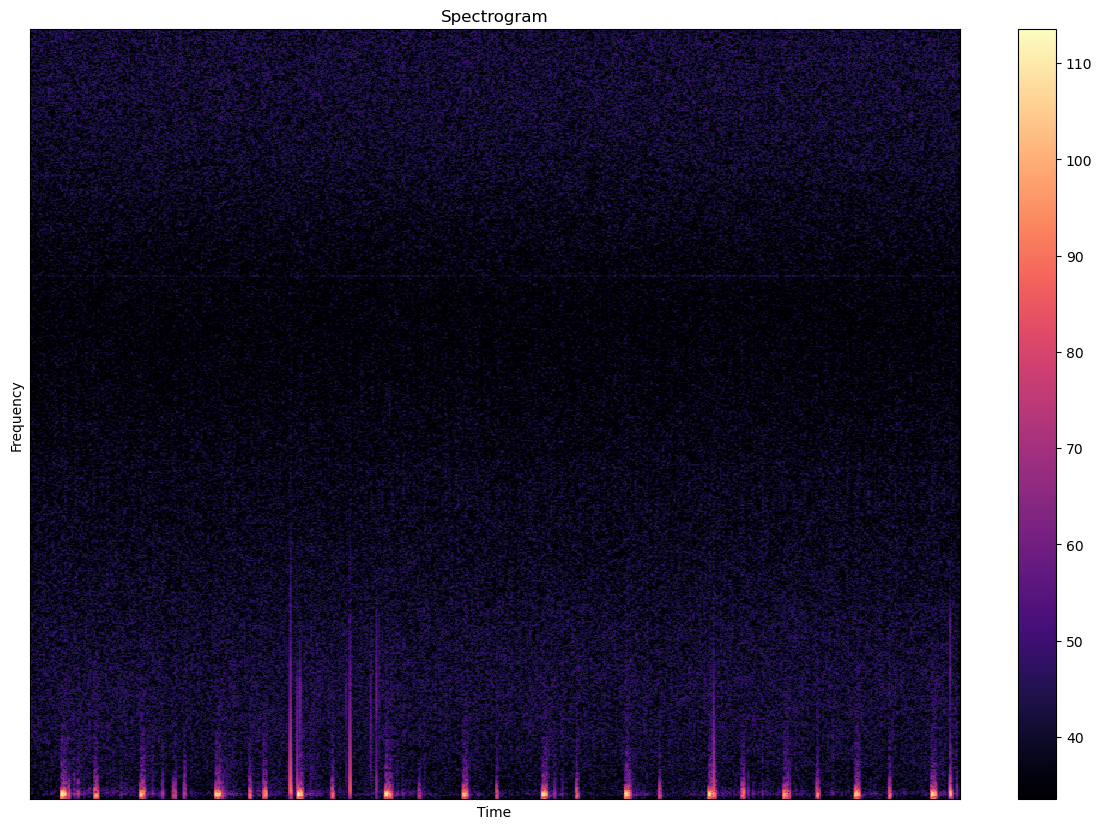

In [144]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sampFreq3
n_fft_duration = float(n_fft)/sampFreq3

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(sound_extrahls.astype(np.float32), n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sampFreq, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

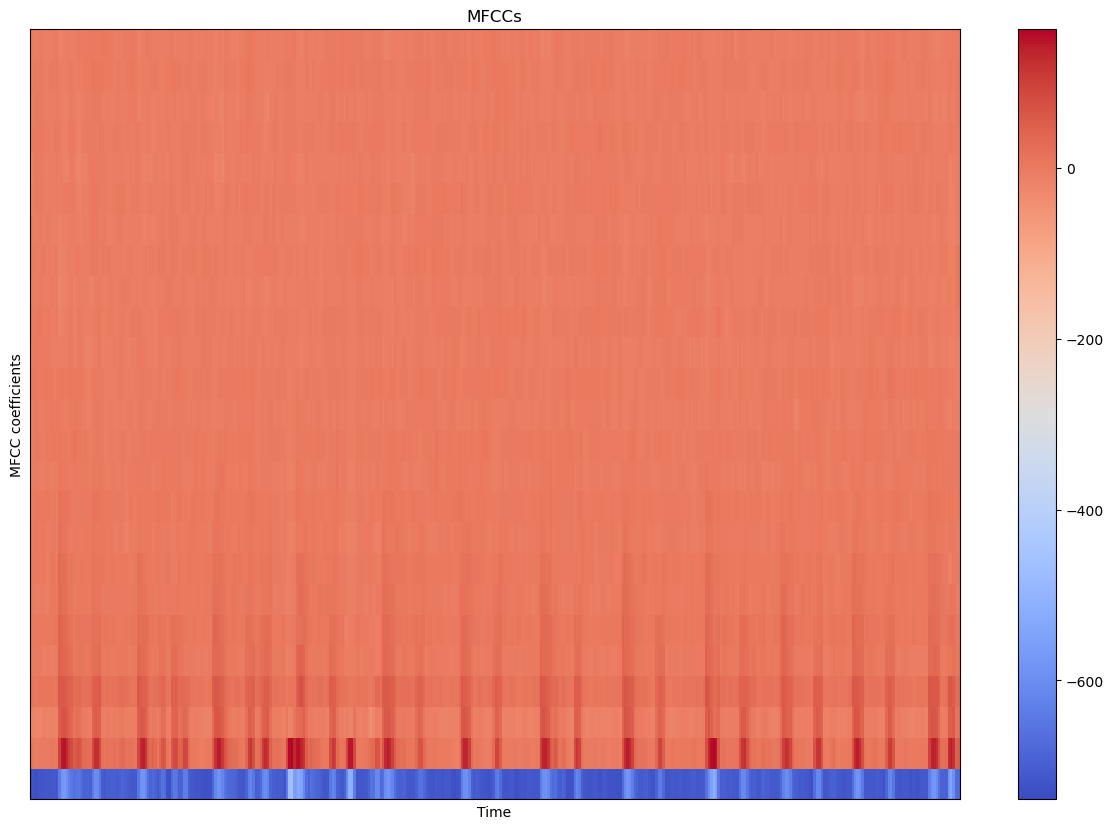

In [146]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=data3,sr=frame3,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=frame3, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

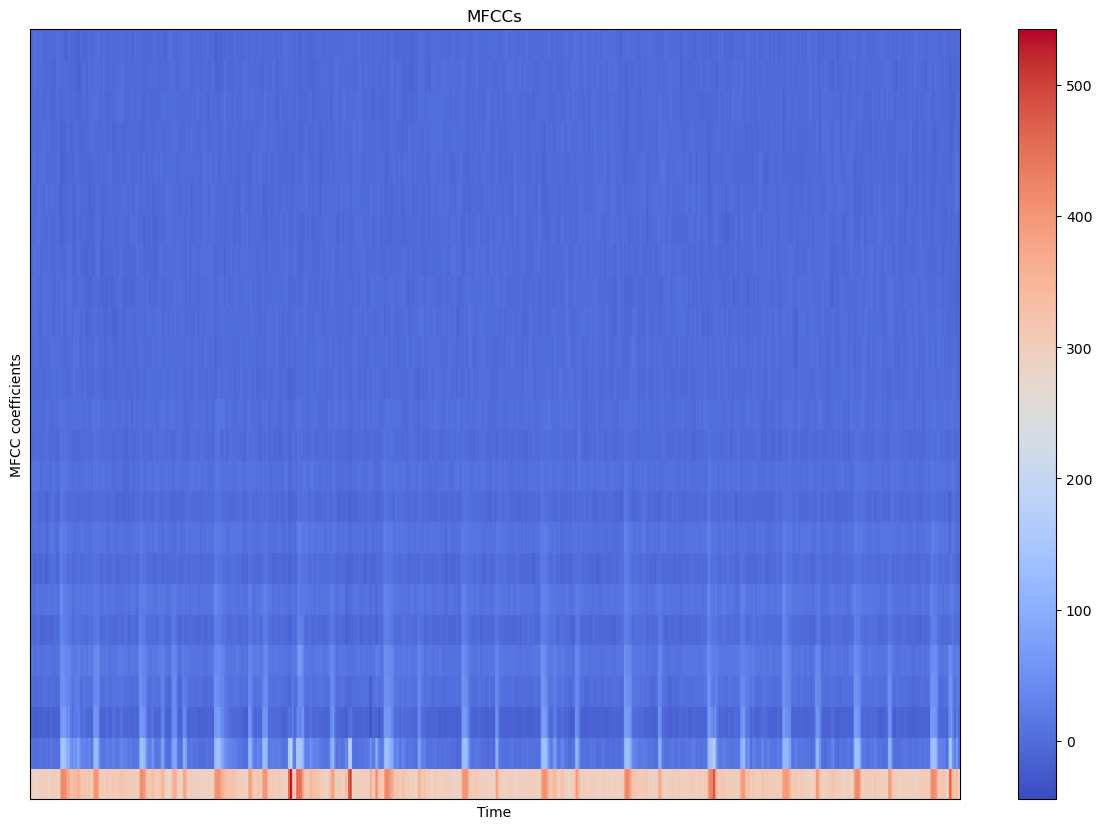

In [147]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=sound_extrahls.astype(np.float32),sr=sampFreq3,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sampFreq3, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

In [148]:
sampFreq4, sound_artifact = wavfile.read("C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/artifact__201106110909.wav")

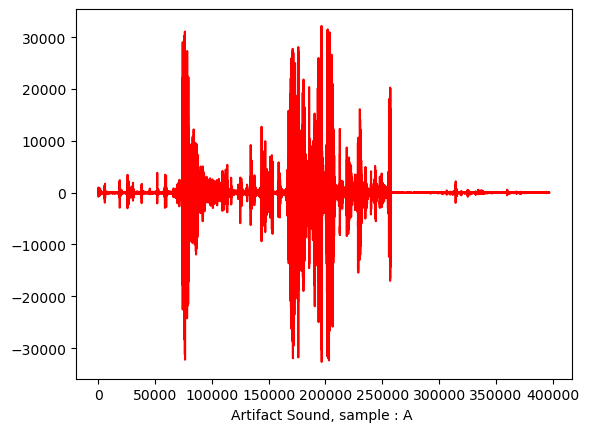

In [151]:
plt.plot(sound_artifact, 'r')
plt.xlabel("Artifact Sound, sample : A ")
plt.show()

In [153]:
data4,frame4=librosa.load('C:/Users/krake/Downloads/heart _sounds_abnormalities_detection_priyanka_madam/set_a/artifact__201106110909.wav')

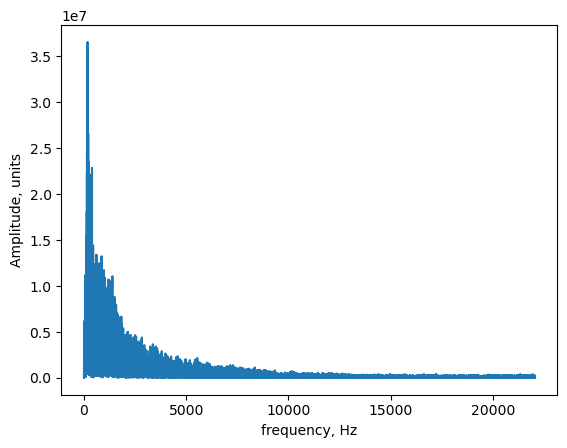

In [156]:
fft_spectrum = np.fft.rfft(sound_artifact)
freq = np.fft.rfftfreq(sound_artifact.size, d=1./sampFreq4)
fft_spectrum
fft_spectrum_abs = np.abs(fft_spectrum)
plt.plot(freq, fft_spectrum_abs)
plt.xlabel("frequency, Hz")
plt.ylabel("Amplitude, units")
plt.show()

STFT hop length duration is: 0.023219954648526078s
STFT window duration is: 0.09287981859410431s


Text(0.5, 1.0, 'Spectrogram')

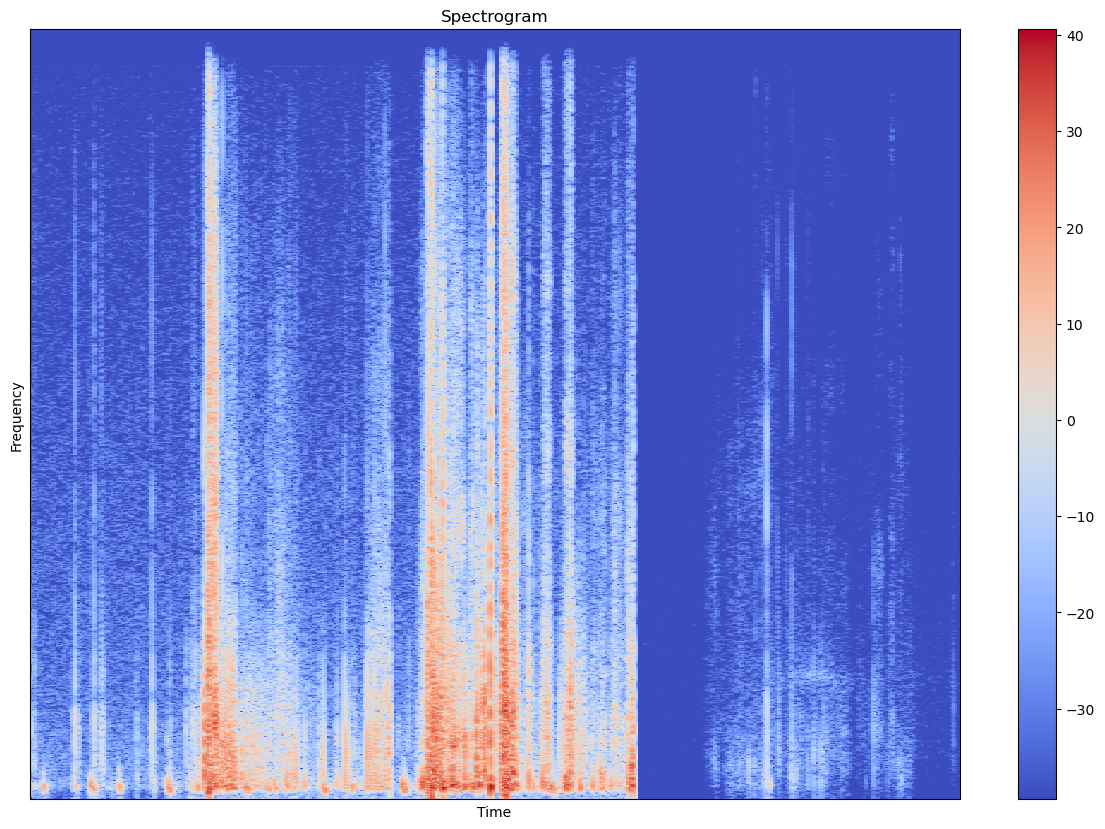

In [158]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/frame4
n_fft_duration = float(n_fft)/frame4

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(data4, n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=frame, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

STFT hop length duration is: 0.011609977324263039s
STFT window duration is: 0.046439909297052155s


Text(0.5, 1.0, 'Spectrogram')

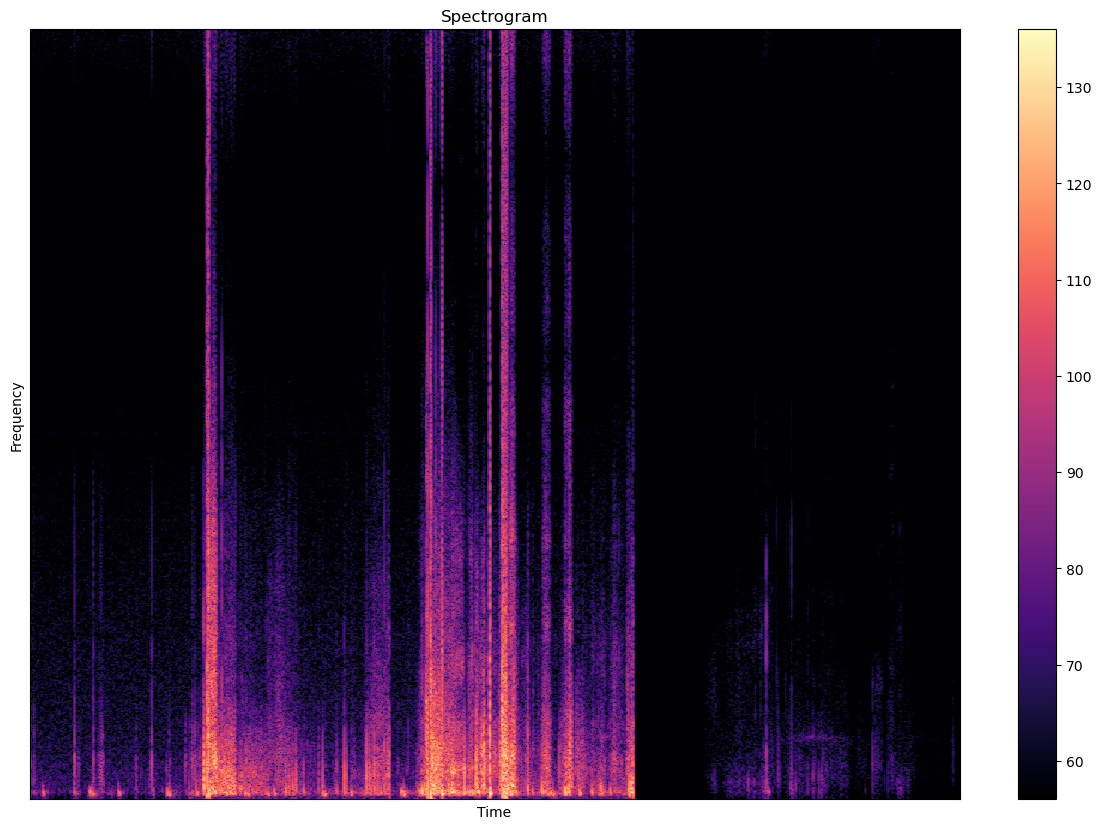

In [160]:
hop_length = 512 # in num. of samples
n_fft = 2048 # window in num. of samples

# calculate duration hop length and window in seconds
hop_length_duration = float(hop_length)/sampFreq4
n_fft_duration = float(n_fft)/sampFreq4

print("STFT hop length duration is: {}s".format(hop_length_duration))
print("STFT window duration is: {}s".format(n_fft_duration))

# perform stft
stft_normal = librosa.stft(sound_artifact.astype(np.float32), n_fft=n_fft, hop_length=hop_length)

# calculate abs values on complex numbers to get magnitude
spectrogram = np.abs(stft_normal)
log_spectrogram = librosa.amplitude_to_db(spectrogram)

# display spectrogram
plt.figure(figsize=(15,10))
librosa.display.specshow(log_spectrogram, sr=sampFreq, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("Spectrogram")

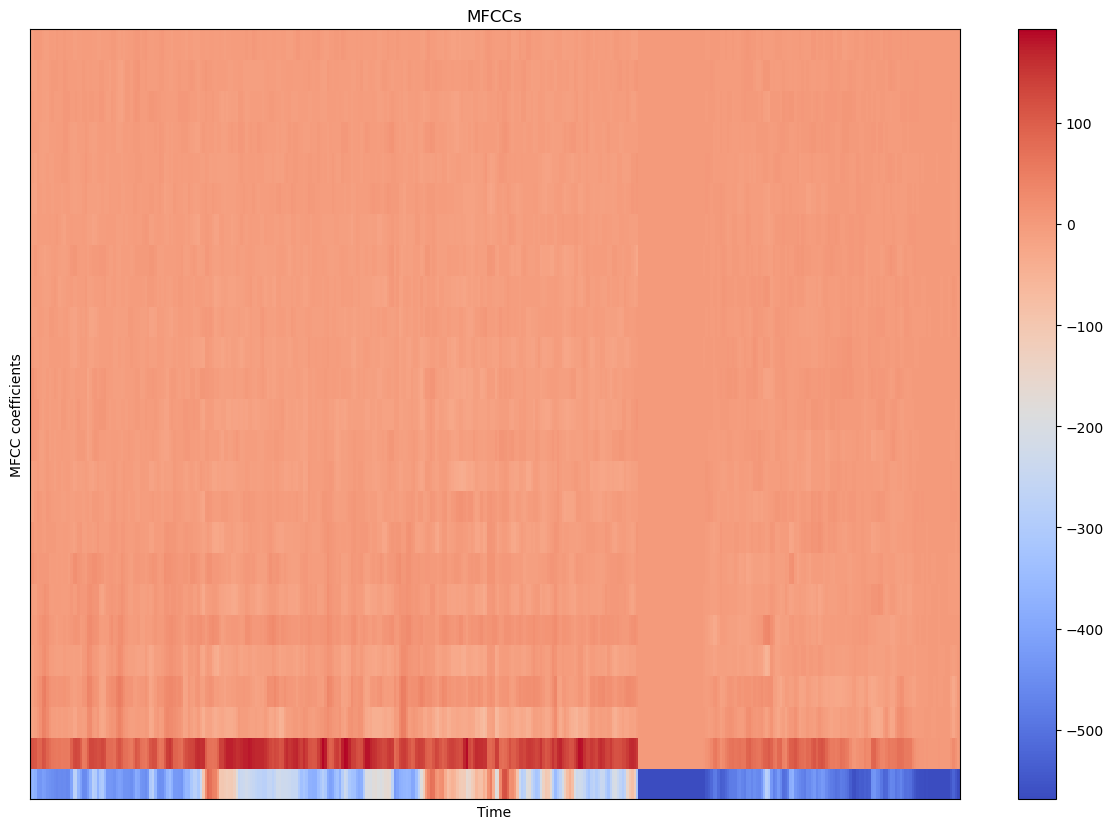

In [162]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=data4,sr=frame4,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=frame4, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()

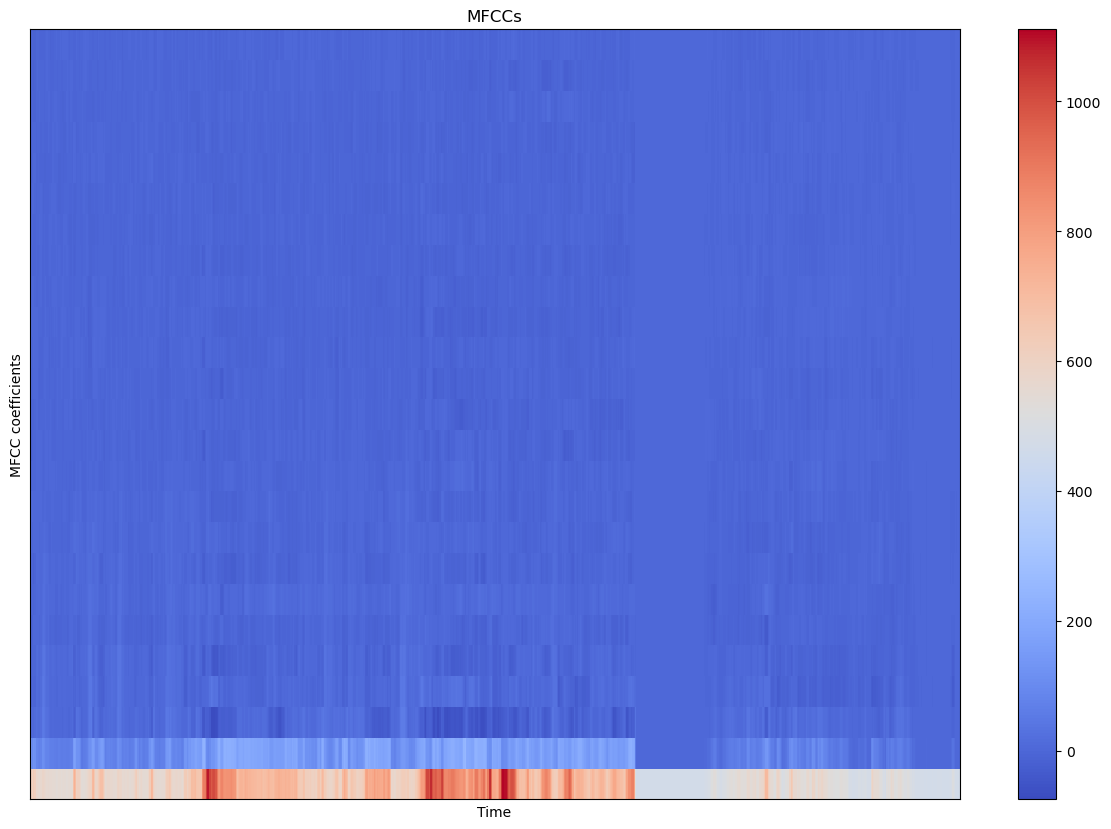

In [164]:
# MFCCs
# extract 25 MFCCs
MFCCs = librosa.feature.mfcc(y=sound_artifact.astype(np.float32),sr=sampFreq4,n_fft=n_fft,hop_length=hop_length,n_mfcc=25)

# display MFCCs
plt.figure(figsize=(15,10))
librosa.display.specshow(MFCCs, sr=sampFreq4, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("MFCC coefficients")
plt.colorbar()
#plt.set_cmap("YlOrBr")
plt.title("MFCCs")

# show plots
plt.show()